In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (RBF)": SVC(probability=True, kernel='rbf', random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
results = []

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-score": f1,
        "AUC-ROC": roc_auc
    })

In [ ]:
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

        Model  Accuracy  F1-score  AUC-ROC
Random Forest  0.757576  0.654321 0.804636
    SVM (RBF)  0.744589  0.614379 0.797351
    KNN (k=5)  0.701299  0.554839 0.750455


In [ ]:
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Confusion Matrix:
[[119  32]
 [ 37  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



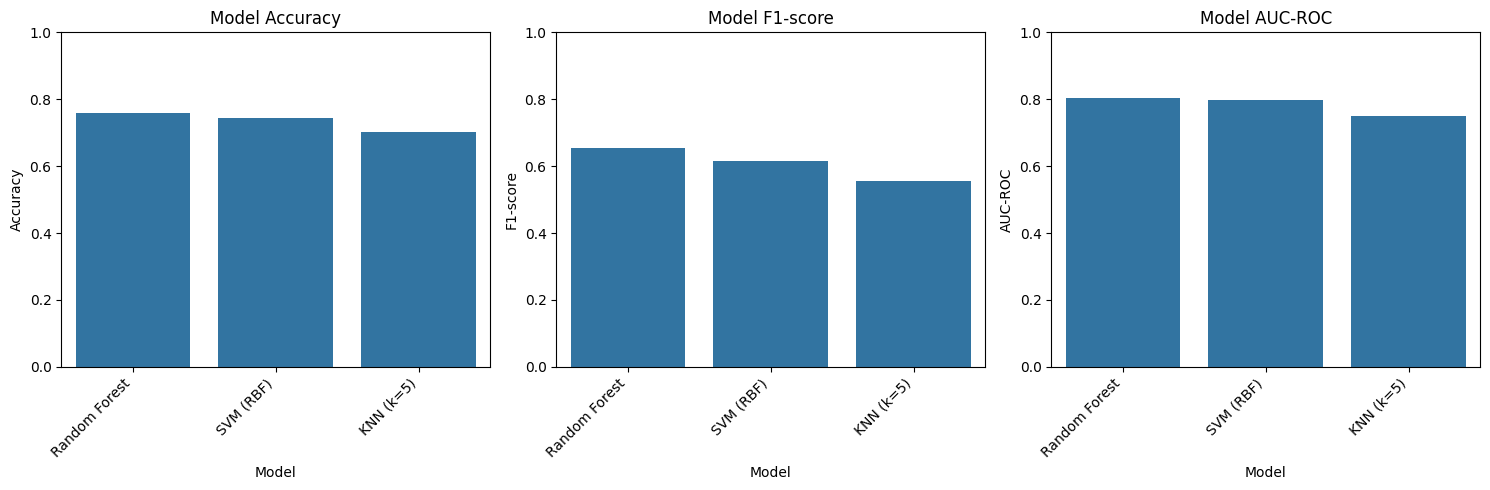

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='F1-score', data=results_df)
plt.title('Model F1-score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='AUC-ROC', data=results_df)
plt.title('Model AUC-ROC')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()